In [2]:
import numpy as np
import pandas as pd
from pyne import data, nucname
from pyne.material import Material
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
results_path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'

In [4]:
nuc_list = ['ac227', 'am241', 'am243', 'ba133', 'cf249', 'cf252', 'cm243', 'cm244', 
            'cm245', 'cs134', 'cs137', 'eu152', 'eu154', 'ho166m', 'kr85', 'nb94', 
            'np236', 'np237', 'pa231', 'pm146', 'pu236', 'pu238', 'pu239', 'pu240', 
            'ra226', 'sb125', 'th228', 'th229', 'u232', 'u233', 'u234', 'u235']

In [5]:
db = pd.read_pickle(results_path + 'nuc32_activities_scaled_1g_reindex.pkl')

# Method 1: PyNE-based Energy Windows

## Plot of (old) example idx num decays wrt gamma energy

In [19]:
nuc_plot = sorted(all_gammas.nucID.unique())

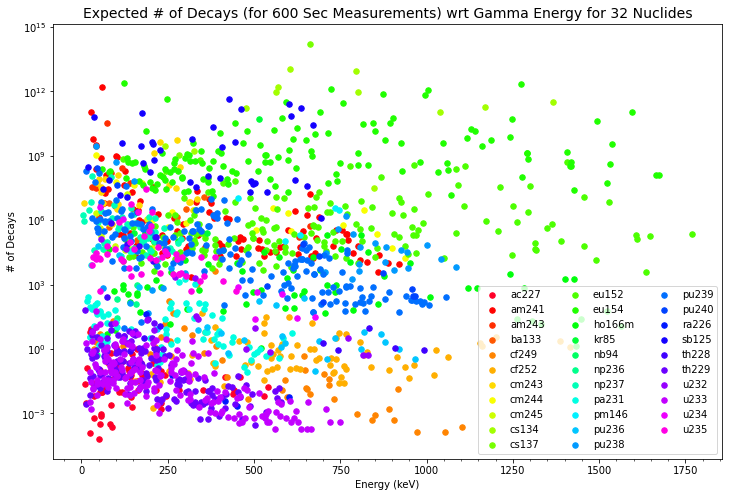

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
num_colors = len(nuc_list)
cm = plt.get_cmap('gist_rainbow')
for i, nuc in enumerate(nuc_list):
    ix = np.where(all_gammas['nucID'] == nuc)
    ax.scatter(all_gammas['energy'].iloc[ix], all_gammas['test_counts'].iloc[ix], 
               color = cm(1.*i/num_colors), label = nuc, s = 30)
ax.minorticks_on()
plt.title('Expected # of Decays (for 600 Sec Measurements) wrt Gamma Energy for 32 Nuclides', fontsize=14)
plt.yscale('log')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('# of Decays')
ax.legend(loc='best', ncol=3)
plt.show()

## Searching DB for samples from various points in training set space
Previously, used only 1 idx to find gamma energies. Now looking into using multiple bwr, pwr, phwr entries to inform energy window lists

Reference ranges for training set
1. Burnup: 0-70 GWd/MTU for PWR/BWR, 0-13 for PHWR
2. Enrichment: 0.5, 1.5, 2, 3, 4, 5 for PWR/BWR, 0.711 for PHWR
3. CT: 0-16 yrs (6000 days) for all

In [7]:
def get_samples(rxtr, cools, burns, enris):
    sub = db.loc[(db['ReactorType'] == rxtr)  & 
                 (db['CoolingTime'] > cools[0]) & (db['CoolingTime'] < cools[1]) & 
                 (db['Burnup'] > burns[0]) & (db['Burnup'] < burns[1]) & 
                 (db['Enrichment'] > enris[0]) & (db['Enrichment'] < enris[1])
                ]
    return sub

#### BWR

In [ ]:
#bwr = get_samples('bwr', [3000,4000], [5000,6000], [2,3])
#bwr = get_samples('bwr', [5000,6000], [55000,60000], [2,3])
bwr = get_samples('bwr', [1000,2000], [30000,45000], [3,5])
bwr = bwr.loc[(db['ModDensity'] == 0.7) & (db['OrigenReactor'] == 'ge7x7-0')]
bwr

In [20]:
bwr_ids = [581837, 379420, 133717]

In [22]:
for idx in bwr_ids:
    print(db.iloc[idx, 0:8])

ReactorType             bwr
CoolingTime         3917.54
Enrichment             2.85
Burnup              5660.91
OrigenReactor      svea64-1
AvgPowerDensity          22
ModDensity              0.5
UiWeight                  1
Name: 581837, dtype: object
ReactorType                  bwr
CoolingTime              5092.06
Enrichment                  2.03
Burnup                   55040.5
OrigenReactor      atrium10x10-9
AvgPowerDensity               10
ModDensity                   0.1
UiWeight                       1
Name: 379420, dtype: object
ReactorType            bwr
CoolingTime        1795.41
Enrichment            4.22
Burnup             44454.3
OrigenReactor      ge7x7-0
AvgPowerDensity         22
ModDensity             0.7
UiWeight                 1
Name: 133717, dtype: object


#### PWR

In [ ]:
#pwr = get_samples('pwr', [3000,4000], [5000,6000], [2,3])
#pwr = get_samples('pwr', [5000,6000], [60000,70000], [3,4])
pwr = get_samples('pwr', [1000,2000], [30000,40000], [3,5])
pwr = pwr.loc[(db['OrigenReactor'] == 's18x18')]
pwr

In [26]:
pwr_ids = [665604, 864351, 759860]

In [27]:
for idx in pwr_ids:
    print(db.iloc[idx, 0:8])

ReactorType            pwr
CoolingTime        3930.03
Enrichment            2.01
Burnup             5540.15
OrigenReactor      ce14x14
AvgPowerDensity         41
ModDensity            0.71
UiWeight                 1
Name: 665604, dtype: object
ReactorType             pwr
CoolingTime         5922.75
Enrichment             3.86
Burnup              69074.3
OrigenReactor      vver1000
AvgPowerDensity          41
ModDensity             0.71
UiWeight                  1
Name: 864351, dtype: object
ReactorType            pwr
CoolingTime        1001.84
Enrichment            3.06
Burnup             32655.6
OrigenReactor       s18x18
AvgPowerDensity         25
ModDensity            0.71
UiWeight                 1
Name: 759860, dtype: object


#### PHWR

In [ ]:
#phwr = get_samples('phwr', [3000,4000], [1000,2000], [0,3])
#phwr = get_samples('phwr', [5000,6000], [11000,13000], [0,3])
phwr = get_samples('phwr', [1000,2000], [4000,6000], [0,3])
phwr = phwr.loc[(db['OrigenReactor'] == 'candu37')]
phwr

In [33]:
phwr_ids = [887351, 893628, 894745]

In [34]:
for idx in phwr_ids:
    print(db.iloc[idx, 0:8])

ReactorType           phwr
CoolingTime        3305.76
Enrichment           0.711
Burnup             1405.24
OrigenReactor      candu19
AvgPowerDensity         22
ModDensity            0.84
UiWeight                 1
Name: 887351, dtype: object
ReactorType           phwr
CoolingTime        5816.18
Enrichment           0.711
Burnup             11771.1
OrigenReactor      candu28
AvgPowerDensity         22
ModDensity            0.84
UiWeight                 1
Name: 893628, dtype: object
ReactorType           phwr
CoolingTime         1188.4
Enrichment           0.711
Burnup             4181.09
OrigenReactor      candu37
AvgPowerDensity        2.2
ModDensity            0.84
UiWeight                 1
Name: 894745, dtype: object


In [35]:
idxs = bwr_ids + pwr_ids + phwr_ids
idxs

[581837, 379420, 133717, 665604, 864351, 759860, 887351, 893628, 894745]

## Pull In Gamma Energies Using PyNE

In [36]:
def manual_gammas(nuclide):
    parent = nucname.id(nuclide)
    decay_c = data.decay_const(parent)
    energies = data.gamma_energy(parent)
    intensities = data.gamma_photon_intensity(parent)
    children = data.gamma_from_to_byparent(parent)
    decay_children = data.decay_data_children(parent)
    decay_branches = data.decay_photon_branch_ratio_byparent(parent)
    
    gammas_result = []
    for i, c in enumerate(children):
        for j, dc in enumerate(decay_children):
            # here is where we skip negative nuclides
            if c[0] > 0:
                if nucname.zzzaaa(c[0]) == nucname.zzzaaa(dc):
                    gammas_result.append((energies[i][0], decay_c*intensities[i][0]*decay_branches[j][0]))
    return gammas_result

In [37]:
def get_all_gammas(df_idx):
    gamma_dflist = []
    for nuc in nuc_list:
        mat = Material()
        act_bq = db.loc[df_idx][nuc] * 3.7e10
        mat.from_activity({nuc : act_bq})
        gamlist = manual_gammas(nuc)
        gamma = pd.DataFrame(gamlist, columns = ['energy', 'rel_intensity'])
        # get gamma intensity in decay/s
        num_atoms = mat.mass * 6.02e23 / data.atomic_mass(nucname.id(nuc))
        gamma['total_intensity'] = num_atoms * gamma['rel_intensity']
        # get num of decays by multiplying by livetime (600 sec)
        gamma['num_decays'] = gamma['total_intensity'] * 600
        gamma['nucID'] = nuc
        gamma['half life (y)'] = data.half_life(nucname.id(nuc)) / 60 / 60 / 24 / 365.25
        gamma_dflist.append(gamma)
    all_gammas = pd.concat(gamma_dflist).reset_index(drop=True)
    return all_gammas

## Choose Energy Bin Windows

In [47]:
def get_en_lists(min_decays):
    nuc_set = []
    en_list_set = []
    for idx in idxs:
        all_gammas = get_all_gammas(idx)
        exp_lines = all_gammas.loc[all_gammas['num_decays'] > min_decays].sort_values('energy')
        en_list = exp_lines['energy'].tolist()
        print('DB IDX: {} \t Energy Windows: {}'.format(idx, len(en_list)))
        nucs = exp_lines['nucID'].drop_duplicates().tolist()
        nuc_set = nuc_set + nucs
        en_list_set = en_list_set + en_list
    return list(set(nuc_set)), list(set(en_list_set))

In [48]:
# short list from min decays cutoff ~5e10
short_nuc_list, short_en_list = get_en_lists(5e10)
print(len(short_en_list))
print(short_nuc_list)

DB IDX: 581837 	 Energy Windows: 8
DB IDX: 379420 	 Energy Windows: 33
DB IDX: 133717 	 Energy Windows: 42
DB IDX: 665604 	 Energy Windows: 8
DB IDX: 864351 	 Energy Windows: 34
DB IDX: 759860 	 Energy Windows: 40
DB IDX: 887351 	 Energy Windows: 1
DB IDX: 893628 	 Energy Windows: 12
DB IDX: 894745 	 Energy Windows: 17
42


['cs137', 'am243', 'kr85', 'sb125', 'cs134', 'am241', 'eu154']

In [50]:
# long list from min decays cutoff ~5e8
long_nuc_list, long_en_list = get_en_lists(6e8)
print(len(long_en_list))
print(long_nuc_list)

DB IDX: 581837 	 Energy Windows: 45
DB IDX: 379420 	 Energy Windows: 138
DB IDX: 133717 	 Energy Windows: 136
DB IDX: 665604 	 Energy Windows: 49
DB IDX: 864351 	 Energy Windows: 129
DB IDX: 759860 	 Energy Windows: 133
DB IDX: 887351 	 Energy Windows: 29
DB IDX: 893628 	 Energy Windows: 61
DB IDX: 894745 	 Energy Windows: 58
151


['cs137',
 'am243',
 'cm243',
 'kr85',
 'cm244',
 'cm245',
 'sb125',
 'cs134',
 'pu238',
 'eu152',
 'am241',
 'eu154']

In [55]:
print(sorted(short_nuc_list))

['am241', 'am243', 'cs134', 'cs137', 'eu154', 'kr85', 'sb125']


## Save Energy Windows as List

In [52]:
import pickle

en_list_pkl = 'energy_list_short.pkl'
with open(results_path + 'detector_response/' + en_list_pkl, 'wb') as filehandle:
    pickle.dump(short_en_list, filehandle)

en_list_pkl = 'energy_list_long.pkl'
with open(results_path + 'detector_response/' + en_list_pkl, 'wb') as filehandle:
    pickle.dump(long_en_list, filehandle)

# Read in 1 File of Gamma Spectra for All Detectors 
#### Need this for plotting results of Method 1, but also for Auto Peaks in Method 2

In [6]:
d1_dir = 'detector_response/d1_hpge/'
d1numcol = 8192
d2_dir = 'detector_response/d2_detective_hpge/'
d2numcol = 8192
d3_dir = 'detector_response/d3_czt/'
d3numcol = 1024
d4_dir = 'detector_response/d4_nai/'
d4numcol = 1024
d5_dir = 'detector_response/d5_labr3/'
d5numcol = 1024
d6_dir = 'detector_response/d6_sri2/'
d6numcol = 1024

In [8]:
datidx = str(891) # spectra file with idx 133717, the idx above with the most peaks above the min limits
d1_datgz = results_path + d1_dir + datidx + '.dat.gz'
d2_datgz = results_path + d2_dir + datidx + '.dat.gz'
d3_datgz = results_path + d3_dir + datidx + '.dat.gz'
d4_datgz = results_path + d4_dir + datidx + '.dat.gz'
d5_datgz = results_path + d5_dir + datidx + '.dat.gz'
d6_datgz = results_path + d6_dir + datidx + '.dat.gz'

In [9]:
def get_energy_bins(bindata):
    with open(bindata) as binfile:
        contents = binfile.readlines()
    binlist = []
    for ebin in contents[1].strip().split(' '):
        binlist.append(float(ebin))
    return binlist
d1_energy_bins = get_energy_bins(results_path + d1_dir + 'energy_bins.dat')
d2_energy_bins = get_energy_bins(results_path + d2_dir + 'energy_bins.dat')
d3_energy_bins = get_energy_bins(results_path + d3_dir + 'energy_bins.dat')
d4_energy_bins = get_energy_bins(results_path + d4_dir + 'energy_bins.dat')
d5_energy_bins = get_energy_bins(results_path + d5_dir + 'energy_bins.dat')
d6_energy_bins = get_energy_bins(results_path + d6_dir + 'energy_bins.dat')

In [10]:
# reads in all 150 spectra in *.dat.gz into a df, and puts energy bins as columns
d1_df = pd.read_csv(d1_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d1numcol+1), names=['DbIdx']+d1_energy_bins, compression='gzip')
d2_df = pd.read_csv(d2_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d2numcol+1), names=['DbIdx']+d2_energy_bins, compression='gzip')
d3_df = pd.read_csv(d3_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d3numcol+1), names=['DbIdx']+d3_energy_bins, compression='gzip')
d4_df = pd.read_csv(d4_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d4numcol+1), names=['DbIdx']+d4_energy_bins, compression='gzip')
d5_df = pd.read_csv(d5_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d5numcol+1), names=['DbIdx']+d5_energy_bins, compression='gzip')
d6_df = pd.read_csv(d6_datgz, sep=' ', index_col=0, header=None, usecols=range(0, d6numcol+1), names=['DbIdx']+d6_energy_bins, compression='gzip')

## Method 1 Results: Plot Spectrum with PyNE-determined Energy Windows

In [22]:
en_delta = 3 #energy window in keV
df_idx = 133717
en_list = pd.read_pickle(results_path + 'detector_response/energy_list_long.pkl')

In [33]:
def plot_spectrum_withlines(df_idx):
    fig, ax = plt.subplots(4, figsize=(18, 18))
    fig.suptitle('Spectrum, Idx: ' + str(df_idx), fontsize=18)
    for a in ax:
        a.plot(d1_energy_bins, d1_df.loc[df_idx], linewidth = 3)
        a.minorticks_on()
        for en in en_list:
            a.axvline(x=en, color='r', linewidth=0.5)
            a.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.3)
    ax[0].set_title('Low Energy', fontsize=12)
    ax[0].set_xlim(0, 450)
    ax[0].set_ylim(0, 1.5e6)
    ax[1].set_title('Med Energy', fontsize=12)
    ax[1].set_xlim(450, 900)
    ax[1].set_ylim(0, 1e6)
    ax[2].set_title('High Energy', fontsize=12)
    ax[2].set_xlim(900, 1700)
    ax[2].set_ylim(0, 2e5)
    ax[3].set_title('XHigh Energy', fontsize=12)
    ax[3].set_xlim(1700, 2500)
    ax[3].set_ylim(0, 3e3)
    plt.show()

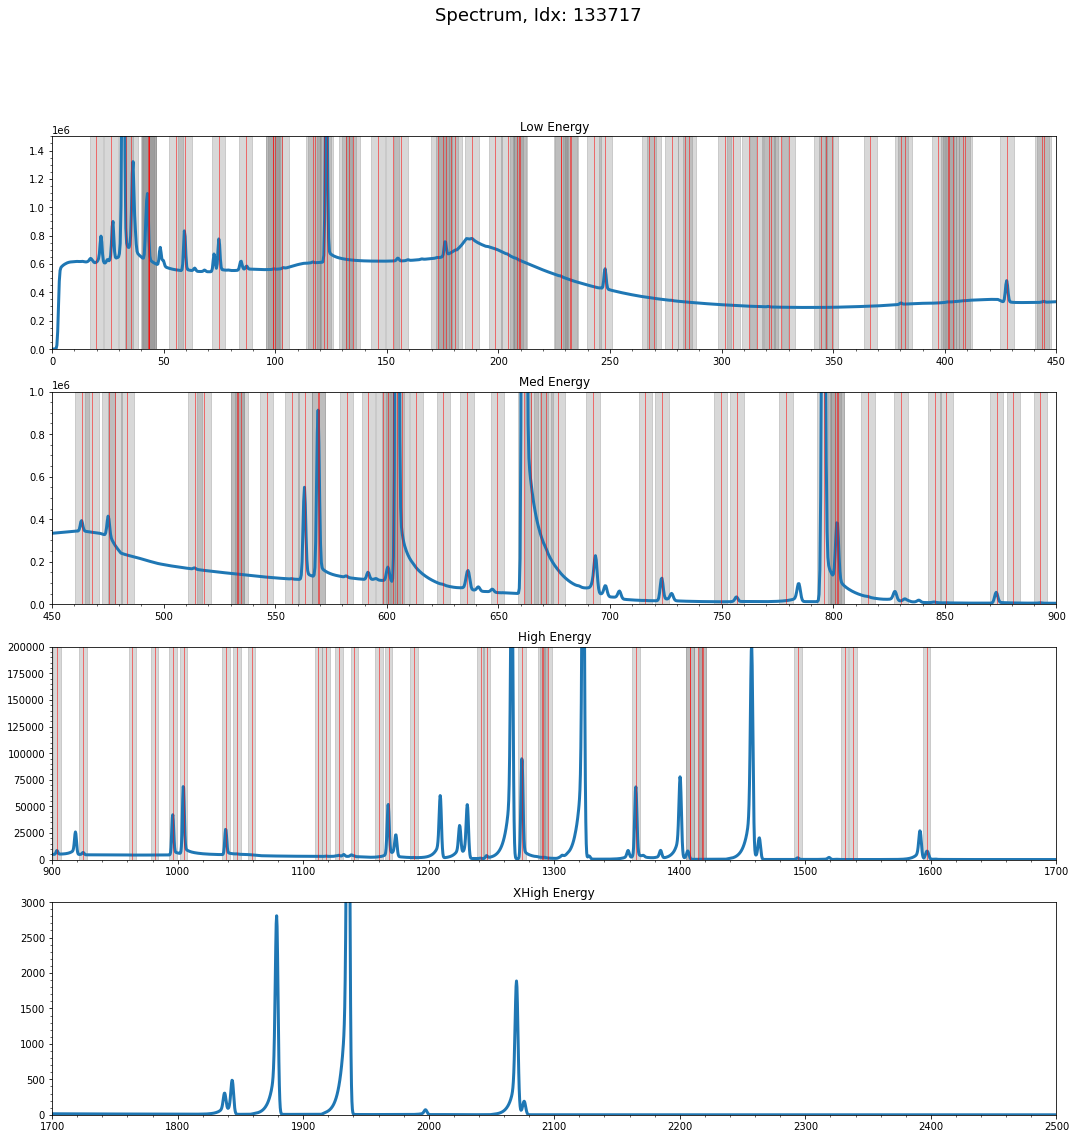

In [34]:
plot_spectrum_withlines(df_idx)

# Method 2: Peak Finding for Energy Windows
## Scipy Auto Peak Find 

In [26]:
import scipy.signal

In [27]:
# chosen from work above
df_idx = 133717

In [81]:
idxs1, _ = scipy.signal.find_peaks(d1_df.loc[df_idx])
idxs2, _ = scipy.signal.find_peaks(d2_df.loc[df_idx])
idxs3, _ = scipy.signal.find_peaks(d3_df.loc[df_idx])
idxs4, _ = scipy.signal.find_peaks(d4_df.loc[df_idx])
idxs5, _ = scipy.signal.find_peaks(d5_df.loc[df_idx])
idxs6, _ = scipy.signal.find_peaks(d6_df.loc[df_idx])

In [82]:
# 891.dat.gz, idx 133717
print(len(idxs1), len(idxs2), len(idxs3), len(idxs4), len(idxs5), len(idxs6))

206 120 30 9 19 17


In [83]:
len(set(idxs1) & set(idxs2))

5

In [84]:
en_list1 = [en for i, en in enumerate(d1_energy_bins) if i in idxs1]
en_list2 = [en for i, en in enumerate(d2_energy_bins) if i in idxs2]
en_list3 = [en for i, en in enumerate(d3_energy_bins) if i in idxs3]
en_list4 = [en for i, en in enumerate(d4_energy_bins) if i in idxs4]
en_list5 = [en for i, en in enumerate(d5_energy_bins) if i in idxs5]
en_list6 = [en for i, en in enumerate(d6_energy_bins) if i in idxs6]

In [85]:
import pickle
en_list_pkl1 = 'idx133717_energy_list_d1auto.pkl'
en_list_pkl2 = 'idx133717_energy_list_d2auto.pkl'
en_list_pkl3 = 'idx133717_energy_list_d3auto.pkl'
en_list_pkl4 = 'idx133717_energy_list_d4auto.pkl'
en_list_pkl5 = 'idx133717_energy_list_d5auto.pkl'
en_list_pkl6 = 'idx133717_energy_list_d6auto.pkl'
with open(results_path + 'detector_response/' + en_list_pkl1, 'wb') as filehandle:
    pickle.dump(en_list1, filehandle)
with open(results_path + 'detector_response/' + en_list_pkl2, 'wb') as filehandle:
    pickle.dump(en_list2, filehandle)
with open(results_path + 'detector_response/' + en_list_pkl3, 'wb') as filehandle:
    pickle.dump(en_list3, filehandle)
with open(results_path + 'detector_response/' + en_list_pkl4, 'wb') as filehandle:
    pickle.dump(en_list4, filehandle)
with open(results_path + 'detector_response/' + en_list_pkl5, 'wb') as filehandle:
    pickle.dump(en_list5, filehandle)
with open(results_path + 'detector_response/' + en_list_pkl6, 'wb') as filehandle:
    pickle.dump(en_list6, filehandle)

In [38]:
def plot_spectrum_autolines(title, x, y, en_list):
    fig, ax = plt.subplots(4, figsize=(18, 18))
    fig.suptitle('Spectrum, Idx: ' + title, fontsize=18)
    for a in ax:
        a.plot(x, y, linewidth = 3)
        a.minorticks_on()
        for en in en_list:
            a.axvline(x=en, color='r', linewidth=0.5)
            a.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.3)
    ax[0].set_title('Low Energy', fontsize=12)
    ax[0].set_xlim(0, 450)
    ax[1].set_title('Med Energy', fontsize=12)
    ax[1].set_xlim(450, 900)
    ax[2].set_title('High Energy', fontsize=12)
    ax[2].set_xlim(900, 1700)  
    ax[3].set_title('More High Energy', fontsize=12)
    ax[3].set_xlim(1700, 2500)   
    return fig, ax

## Idxs from 891.dat.gz

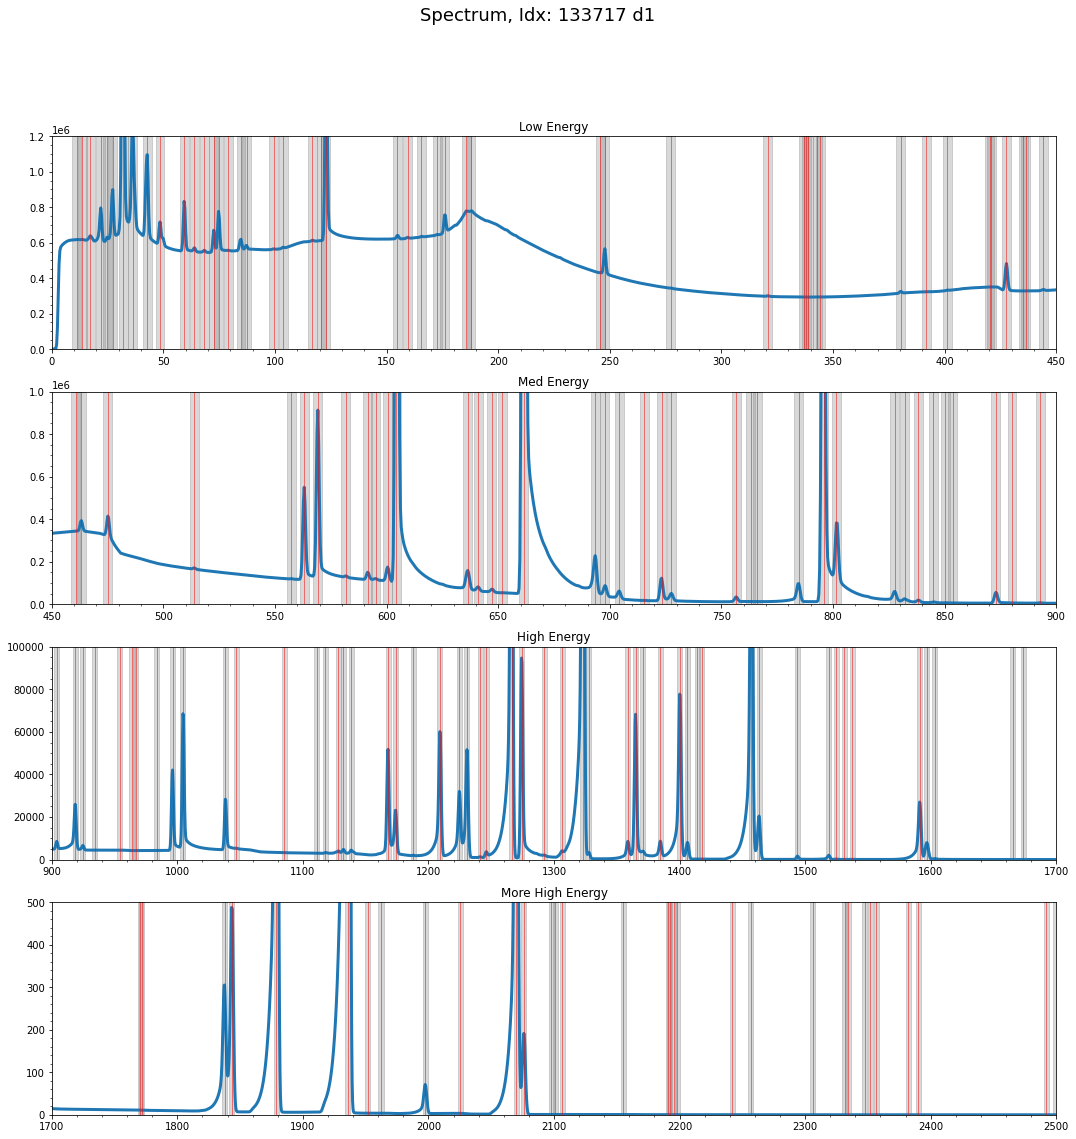

In [59]:
en_delta = 2 # d1 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d1', d1_energy_bins, d1_df.loc[df_idx], en_list1)
ax[0].set_ylim(0, 1.2e6)
ax[1].set_ylim(0, 1e6)
ax[2].set_ylim(0, 1e5)
ax[3].set_ylim(0, 5e2)
plt.show()

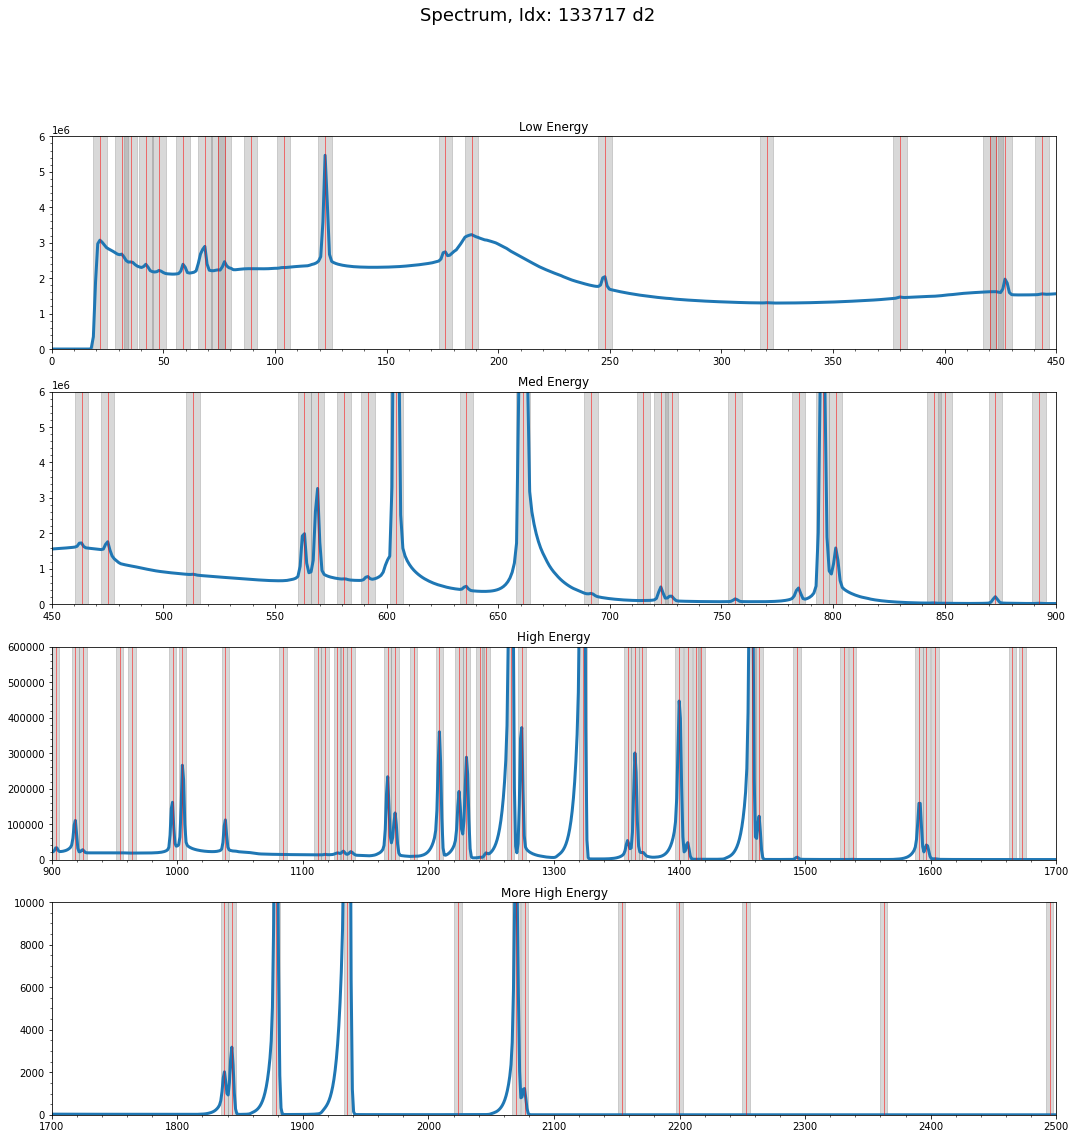

In [58]:
en_delta = 3 # d2 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d2', d2_energy_bins, d2_df.loc[df_idx], en_list2)
ax[0].set_ylim(0, 6e6)
ax[1].set_ylim(0, 6e6)
ax[2].set_ylim(0, 6e5)
ax[3].set_ylim(0, 1e4)
plt.show()

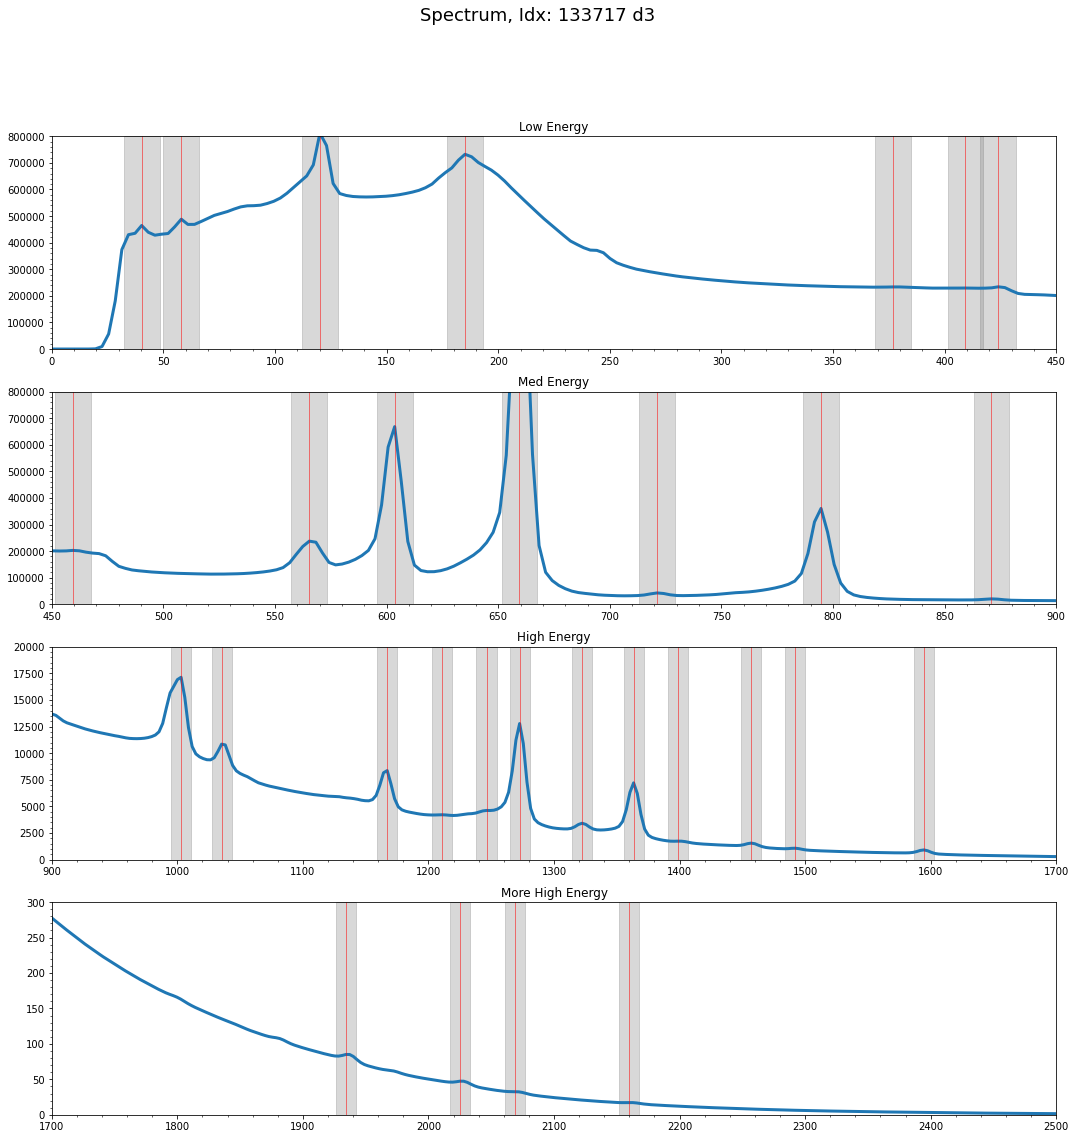

In [44]:
en_delta = 8 # d3 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d3', d3_energy_bins, d3_df.loc[df_idx], en_list3)
ax[0].set_ylim(0, 8e5)
ax[1].set_ylim(0, 8e5)
ax[2].set_ylim(0, 2e4)
ax[3].set_ylim(0, 3e2)
plt.show()

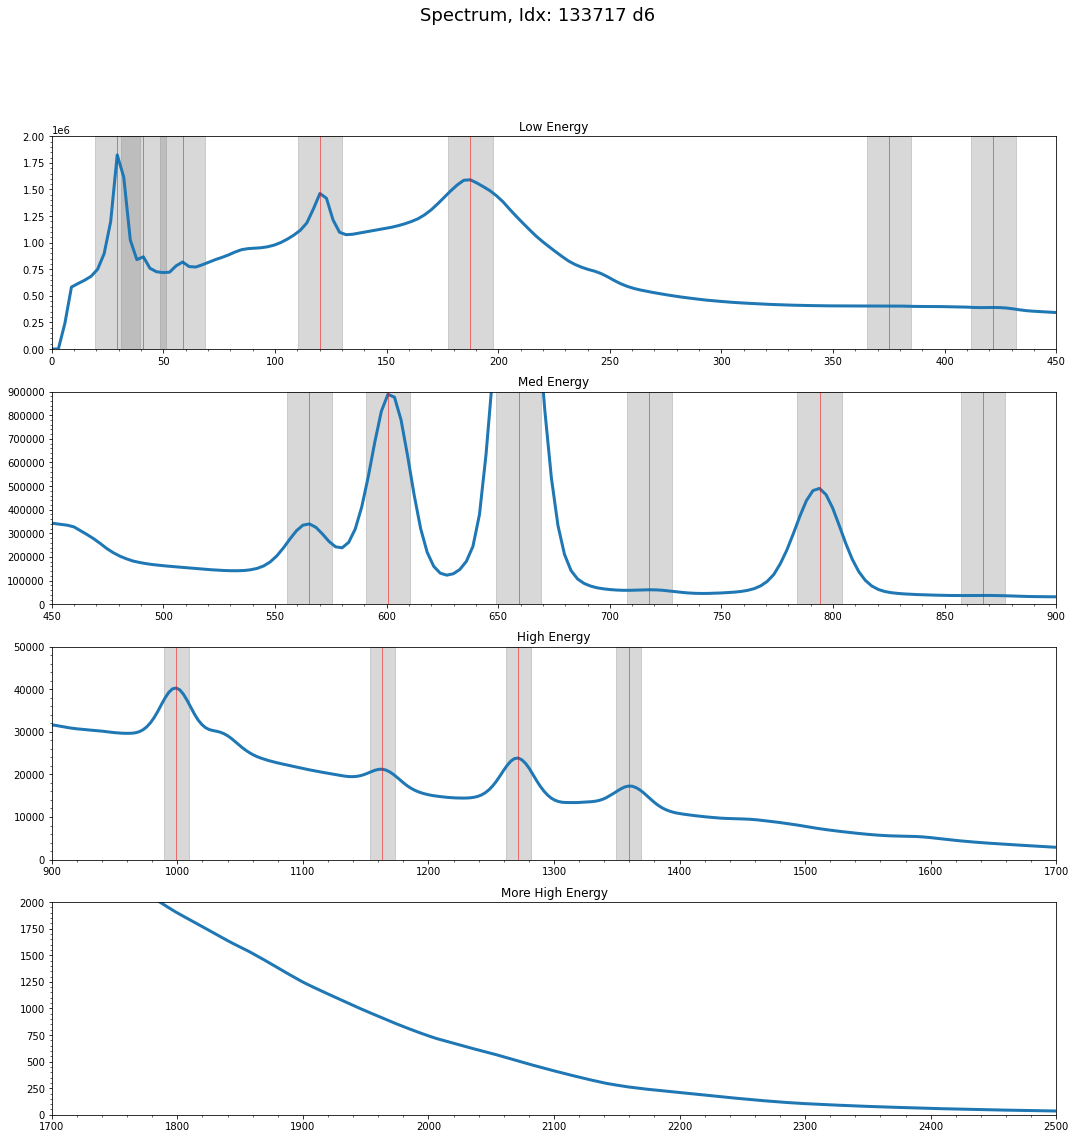

In [48]:
en_delta = 10 # d6 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d6', d6_energy_bins, d6_df.loc[df_idx], en_list6)
ax[0].set_ylim(0, 2e6)
ax[1].set_ylim(0, 9e5)
ax[2].set_ylim(0, 5e4)
ax[3].set_ylim(0, 2e3)
plt.show()

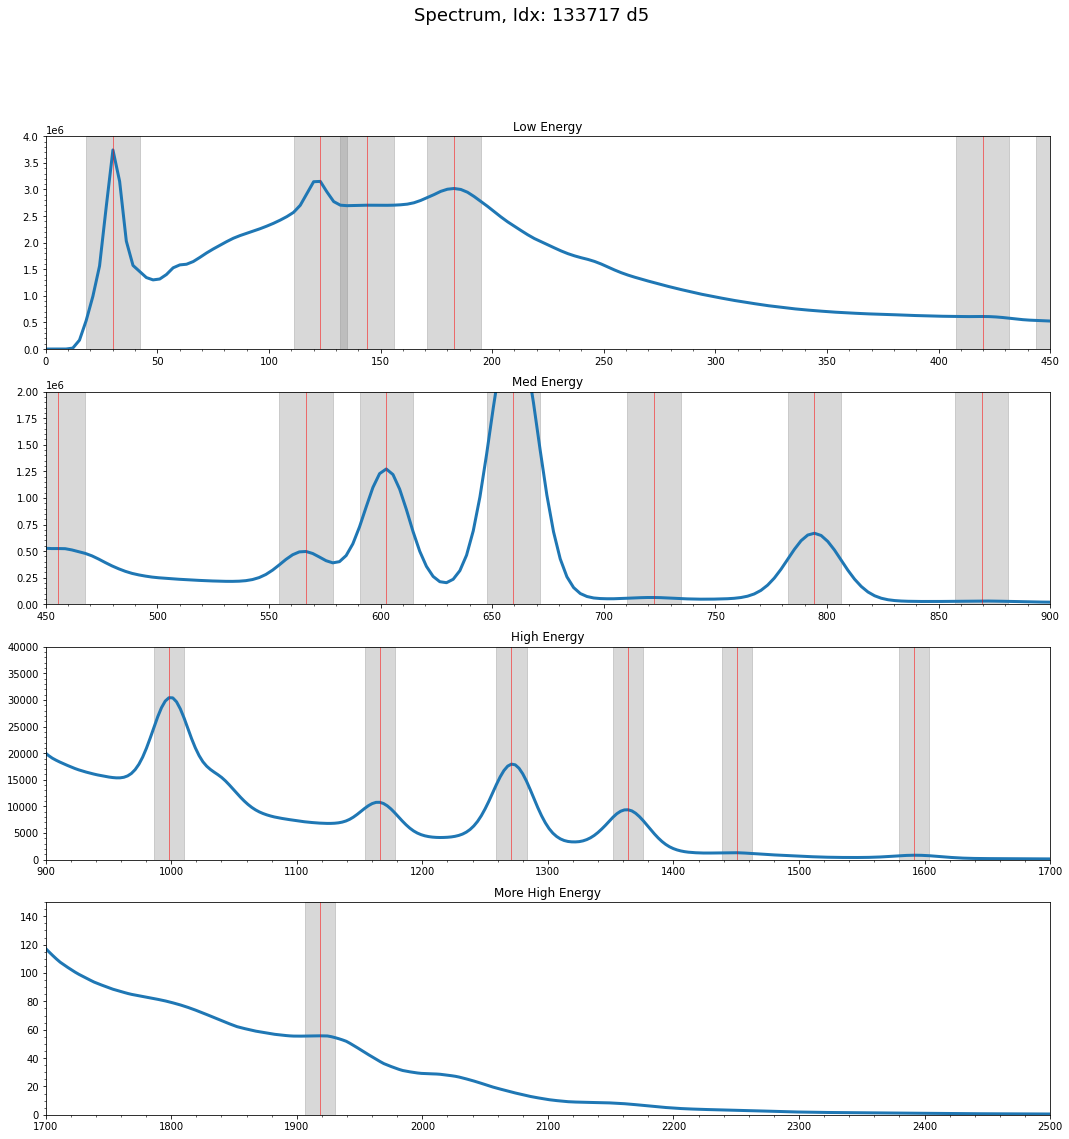

In [52]:
en_delta = 12 # d5 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d5', d5_energy_bins, d5_df.loc[df_idx], en_list5)
ax[0].set_ylim(0, 4e6)
ax[1].set_ylim(0, 2e6)
ax[2].set_ylim(0, 4e4)
ax[3].set_ylim(0, 1.5e2)
plt.show()

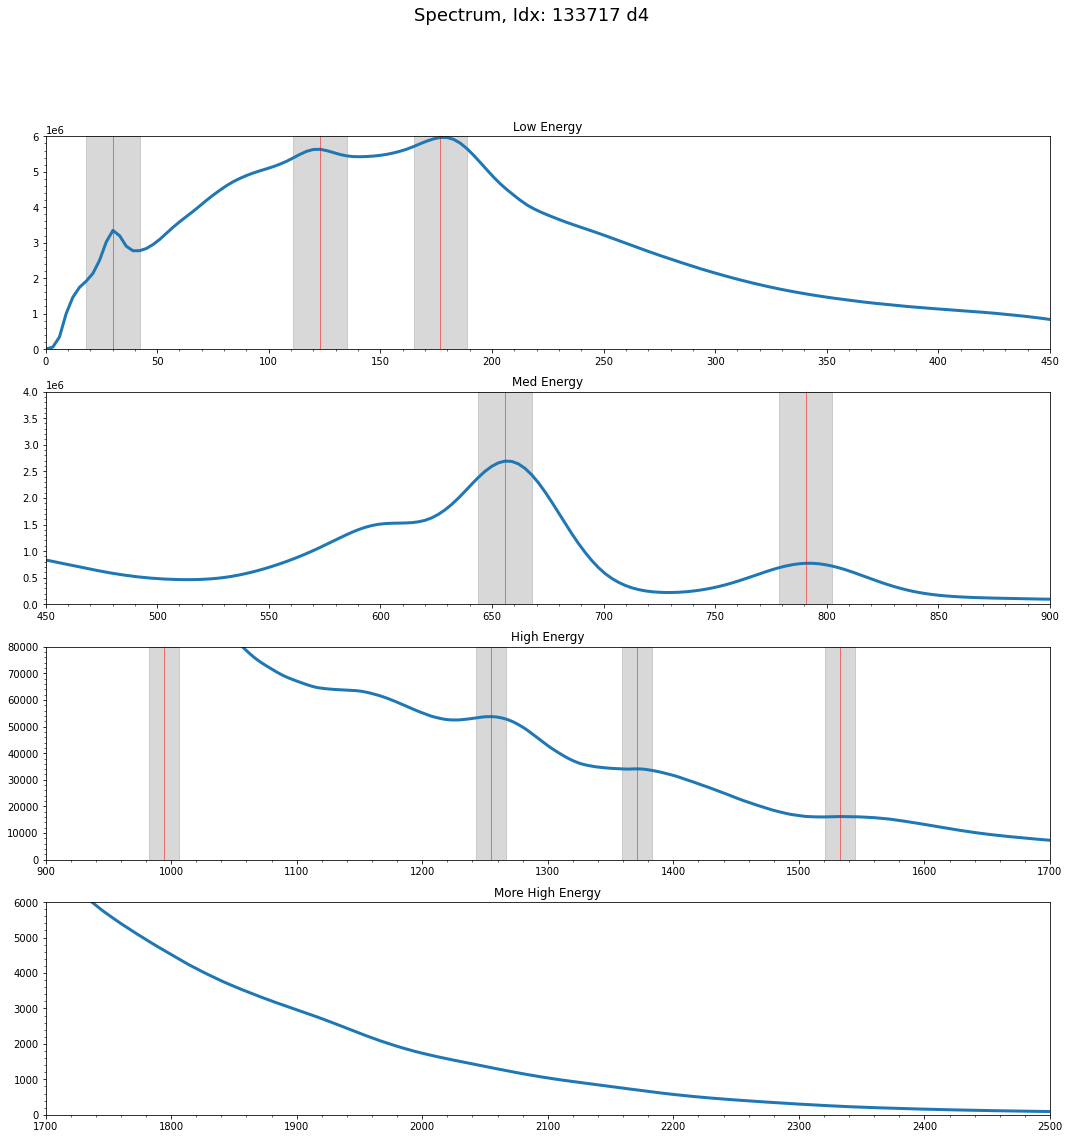

In [56]:
en_delta = 12 # d4 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d4', d4_energy_bins, d4_df.loc[df_idx], en_list4)
ax[0].set_ylim(0, 6e6)
ax[1].set_ylim(0, 4e6)
ax[2].set_ylim(0, 8e4)
ax[3].set_ylim(0, 6e3)
plt.show()

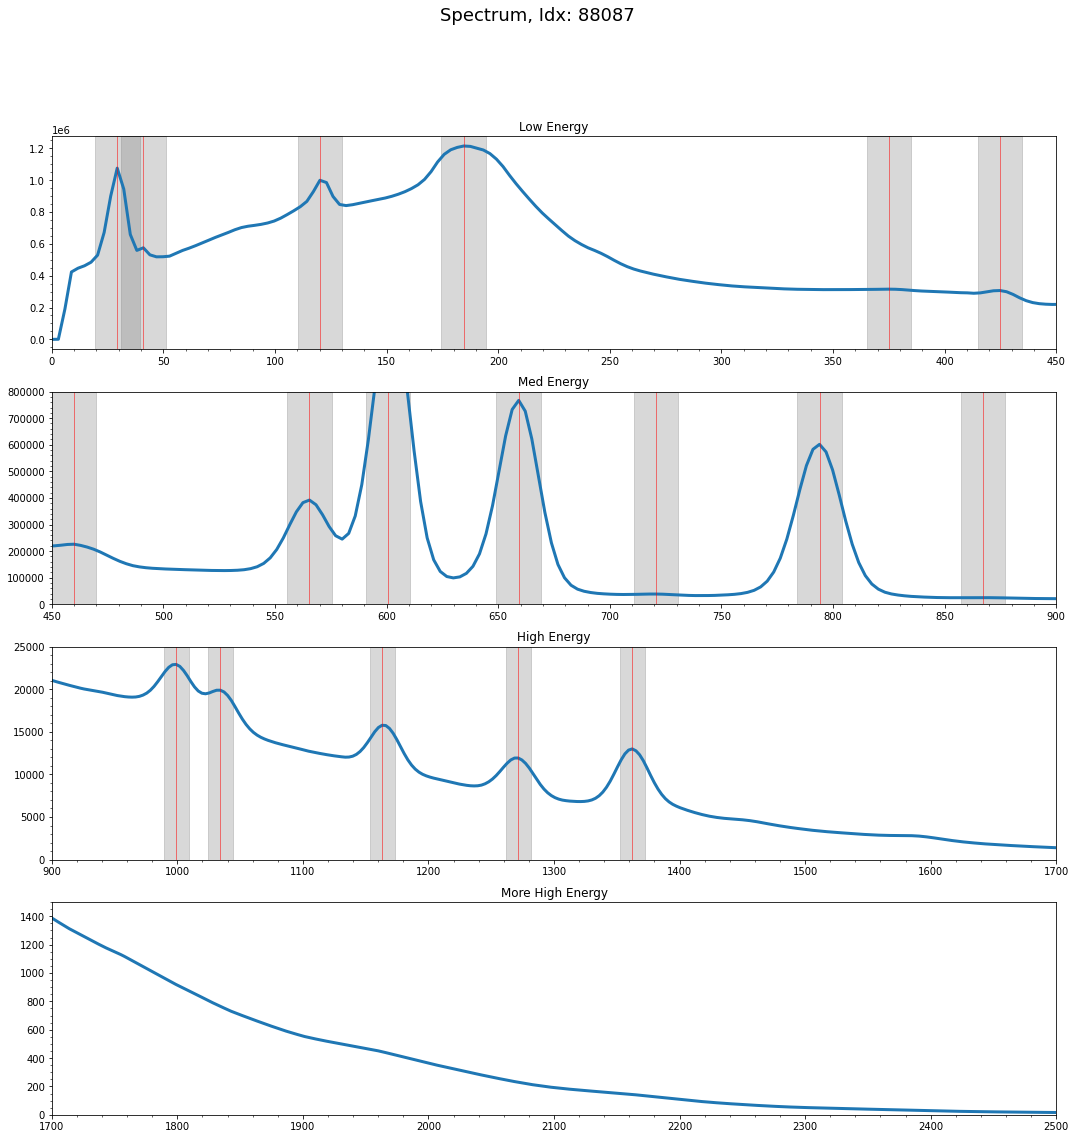

In [34]:
# 133650 - 133800
df_idx = 133800
en_delta = 10 # d6 en_delta
fig, ax = plot_spectrum_autolines(str(df_idx) + ' d6', d6_energy_bins, d6_df.loc[df_idx], en_list6)